In [19]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()

In [5]:
from pandas import read_excel
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

In [13]:
series = read_excel('Fires_in_london_counts.xlsx', sheet_name='fire counts')

In [14]:
print(series.columns.values)

['year' 'fire counts']


In [15]:
series.head()

,year,fire counts
0,1966,30436
1,1967,32956
2,1968,32922
3,1969,43733
4,1970,51835


In [16]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         55 non-null     int64
 1   fire counts  55 non-null     int64
dtypes: int64(2)
memory usage: 1008.0 bytes


In [10]:
series_null=series[pd.isnull(series['Fire Counts'])]

In [11]:

series_ratio = len(series[pd.isnull(series['fire Counts'])])/len(series)
print(series_ratio)

0.0


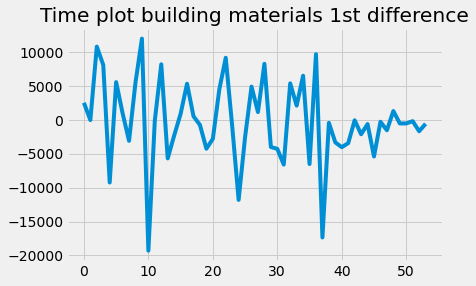

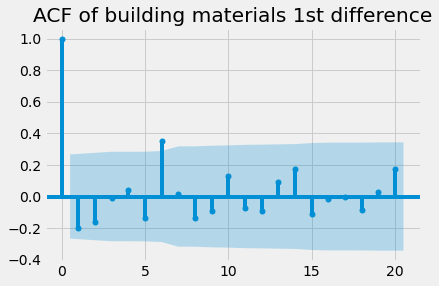

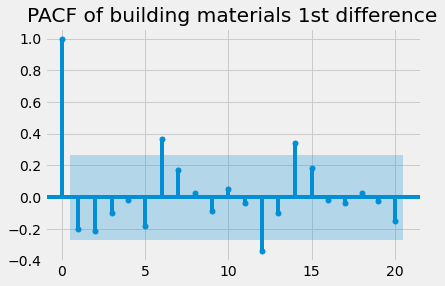

In [37]:

series = read_excel('Fires_in_london_counts.xlsx', sheet_name='fire counts', usecols = [1], 
                             header=0, squeeze=True, dtype=float) 
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.title('Time plot building materials 1st difference')

# ACF plot of time series
plot_acf(diff, title='ACF of building materials 1st difference', lags=20)

# PACF plot of time series
plot_pacf(diff, title='PACF of building materials 1st difference', lags=20)
pyplot.show()

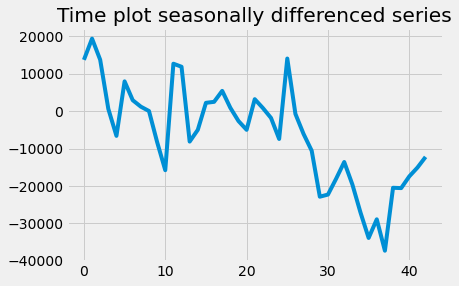

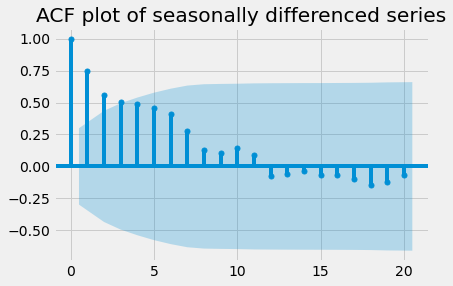

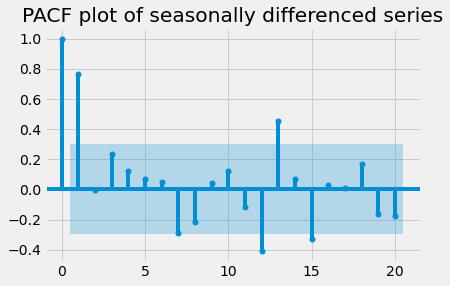

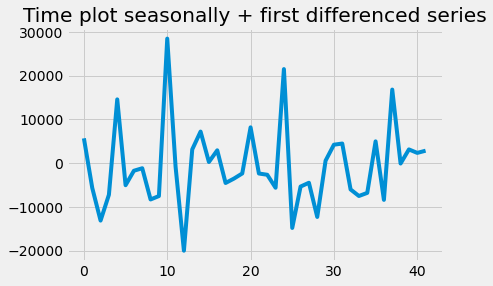

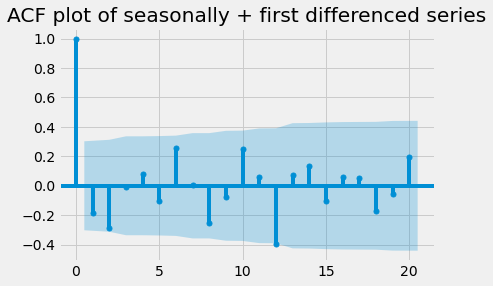

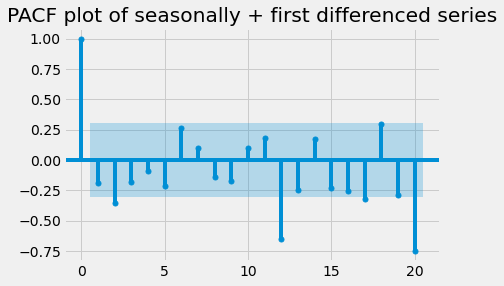

In [38]:
series = read_excel('Fires_in_london_counts.xlsx', sheet_name='fire counts', usecols = [1], 
                             header=0, squeeze=True, dtype=float) 
#  Seaonal difference
X = series.values
SeasDiff = list()
for i in range(12, len(X)):
	value = X[i] - X[i - 12]
	SeasDiff.append(value)
    
# Time, ACF, and PACF plots for the seasonally differenced series
pyplot.plot(SeasDiff)
pyplot.title('Time plot seasonally differenced series')
plot_acf(SeasDiff, title='ACF plot of seasonally differenced series', lags=20)
plot_pacf(SeasDiff, title='PACF plot of seasonally differenced series', lags=20)
pyplot.show()

# Seasonal + First difference
Y = SeasDiff
SeasFirstDiff = list()
for i in range(1, len(Y)):
	value = Y[i] - Y[i - 1]
	SeasFirstDiff.append(value)
pyplot.plot(SeasFirstDiff)
pyplot.title('Time plot seasonally + first differenced series')
plot_acf(SeasFirstDiff, title='ACF plot of seasonally + first differenced series', lags=20)
plot_pacf(SeasFirstDiff, title='PACF plot of seasonally + first differenced series', lags=20)
pyplot.show()


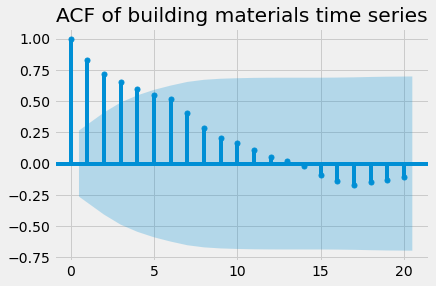

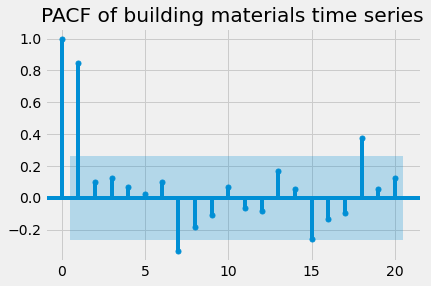

In [39]:
series = read_excel('Fires_in_london_counts.xlsx', sheet_name='fire counts', usecols = [1], 
                             header=0, squeeze=True, dtype=float) 
# ACF plot on 50 time lags
plot_acf(series, title='ACF of building materials time series', lags=20)

# PACF plot on 50 time lags
plot_pacf(series, title='PACF of building materials time series', lags=20)
pyplot.show()

In [40]:
from pandas import read_excel
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import warnings
import itertools
plt.style.use('fivethirtyeight')

df = read_excel('Fires_in_london_counts.xlsx', sheet_name='fire counts', usecols = [1], 
                             header=0, squeeze=True, dtype=float) 
#===================================================
#Identifying the parameters with smallest AIC
#===================================================
#Define the p, d and q parameters to take any value between 0 and 1
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#print(len(pdq))
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Find the best combination of param and param_seasonal which satisfies minimum AIC
collectAICs= []
parameter = []
parameter_seasonal = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(df,
                                        order=param,
                                        seasonal_order=param_seasonal,                                        
                                        enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        collectAICs.append(results.aic)
        parameter.append(param)
        parameter_seasonal.append(param_seasonal)      
index = collectAICs.index(min(collectAICs))
print(collectAICs)
print("The most appropriate combination:","parameter:",parameter[index],
      "parameter_seasonal:",parameter_seasonal[index],"Corresponding AIC:",
      collectAICs[index])


ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1330.7451036826883
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1291.380692103388
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:950.8139341140765
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1882.3852652199248
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1238.577411577923
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1238.654930533925
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:953.2160905907697
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:1931.6767527008196
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1297.2214630151948
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1294.090847822506
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:929.5128865612198
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:1889.2885977528356
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1292.1910198434982
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1294.0772935765253
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:931.4404669501947
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:1885.3857260438335
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1097.4026693490287
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1107.333436861926
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:88

/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/opt/conda/envs/sds2020/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                        fire counts   No. Observations:                   55
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -429.933
Date:                            Sun, 08 Aug 2021   AIC                            867.866
Time:                                    08:27:00   BIC                            874.817
Sample:                                         0   HQIC                           870.414
                                             - 55                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2422      0.150     -1.615      0.106      -0.536       0.052
ar.S.L12       0.0939      0.143   

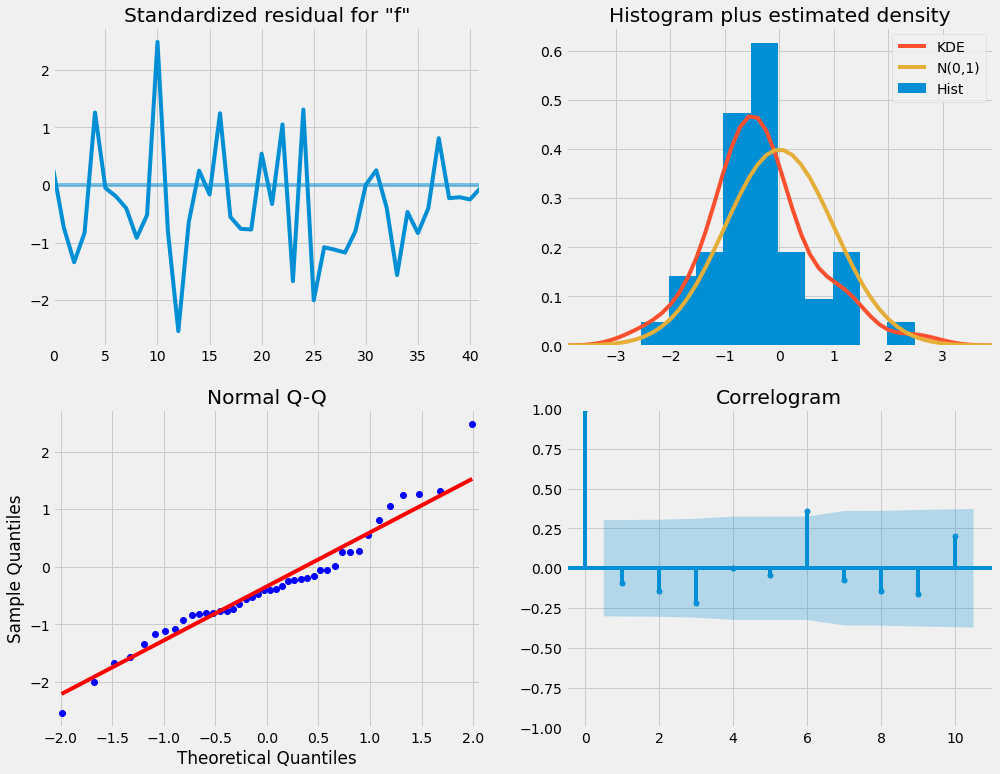

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [18]:
from pandas import read_excel
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm  
plt.style.use('fivethirtyeight')

#==================================================================
#Loading the data set

df = read_excel('Fires_in_london_counts.xlsx', sheet_name='fire counts', usecols = [1], 
                             header=0, squeeze=True, dtype=float) 
#==================================================================

#==================================================================
#Fitting the ARIMA model and printing related statistics
# ARIMA(0, 1, 1)(0,1,1)12 in this case; 
#this one is based on MA1 model template
mod = sm.tsa.statespace.SARIMAX(df, order=(0,1,1), seasonal_order=(1,1,1,12))
results = mod.fit(disp=False)
print(results.summary())
#==================================================================

#GRAPH BLOCK1======================================================
#Printing the graphical statistics of model (correlogram = ACF plot)
results.plot_diagnostics(figsize=(15, 12))
plt.show() 
#==================================================================

#GRAPH BLOCK2======================================================
# printing the part of forecasts fitted to original data (for accuracy evaluation)
# the start date has to be provided; hence should be a time within the original time series;
# in this case, it is to start on 01 January 2000
pred = results.get_prediction(start=pd.to_datetime('1966'), dynamic=False)
pred_ci = pred.conf_int()

# printing one-step ahead forecasts together with the original data set;
# hence, the starting point (year) of the data set is required 
# in order to build the plot of original series
ax = df['1966':].plot(label='Original data')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7) 
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()
#===================================================================

#GRAPH BLOCK3=======================================================
# Get forecast 20 steps ahead in future
pred_uc = results.get_forecast(steps=12)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
# plotting forecasts ahead
ax = df.plot(label='Original data')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast values', title='Forecast plot with confidence interval')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
plt.legend()
plt.show()
#====================================================================

#====================================================================
# MSE evaluation
y_forecasted = pred.predicted_mean
y_truth = df['1966':]
# Compute the mean square error
MSE = ((y_forecasted - y_truth) ** 2).mean()
print('MSE of the forecasts is {}'.format(round(MSE, 2)))
#====================================================================